In [1]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Exploracion de datos

In [2]:
data = pd.read_csv('/work/rating-prediction-/books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Limpieza de datos 

In [4]:
data.duplicated().any()

False

head map para verificar el resultado

<AxesSubplot:>

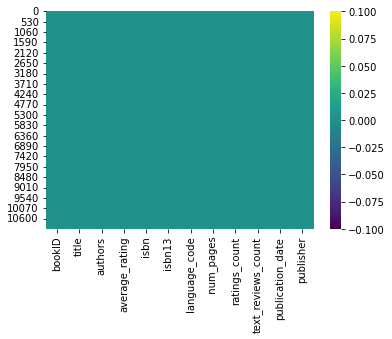

In [5]:
sns.heatmap(data.isnull(), cmap='viridis')

In [6]:
df = pd.DataFrame(data)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
print(df.shape)

(11123, 12)


Analisis de datos

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

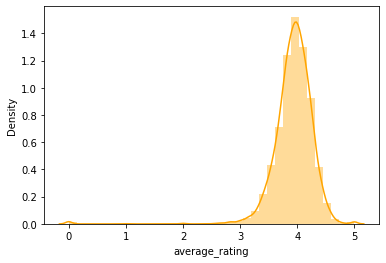

In [8]:
#distribución del rating
sns.distplot(df['average_rating'], hist=True, kde=True, bins=int(180/5), color = 'orange')


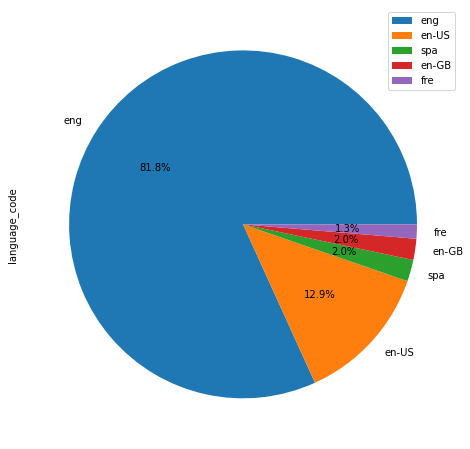

In [9]:
#top 5 languages
languages = df['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

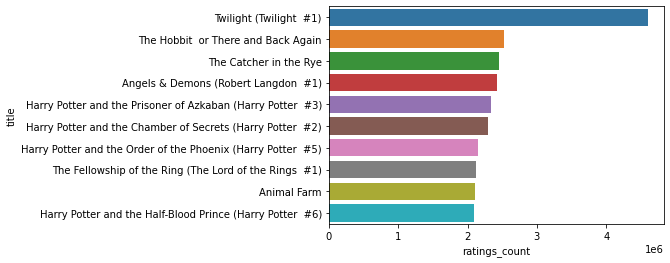

In [10]:
# top 10 highes rated books
popular_books = df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

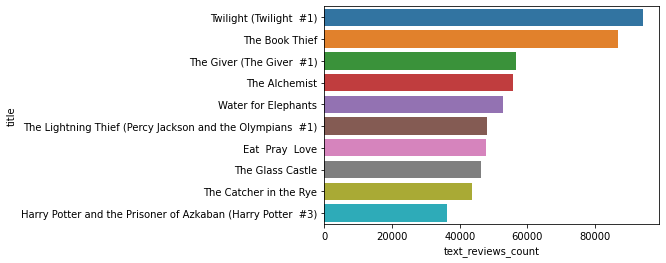

In [11]:
# top 10 highest reviewed books
highest_reviews = df.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

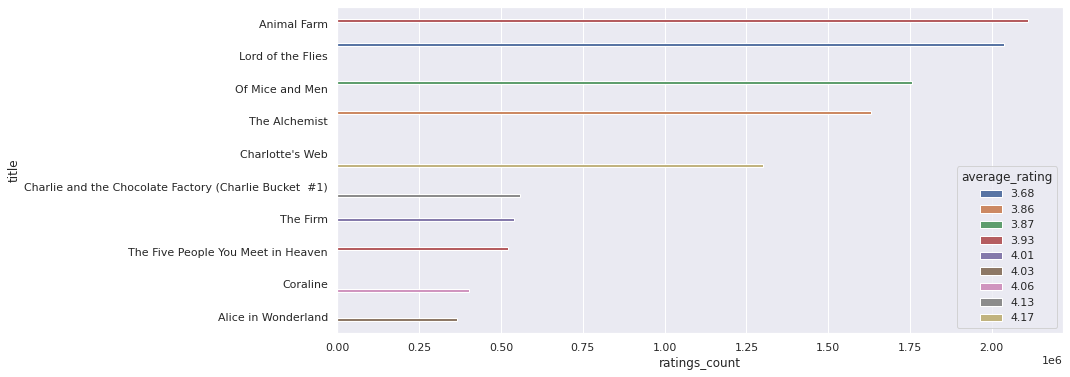

In [12]:
# top 10 books under 200 pages
under200 = df[df['  num_pages'] <= 200]
top10_under200 = under200.nlargest(10, ['ratings_count'])
sns.set(rc = {'figure.figsize':(13,6)})
sns.barplot(top10_under200['ratings_count'], top10_under200['title'], hue=top10_under200['average_rating'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='  num_pages', ylabel='title'>

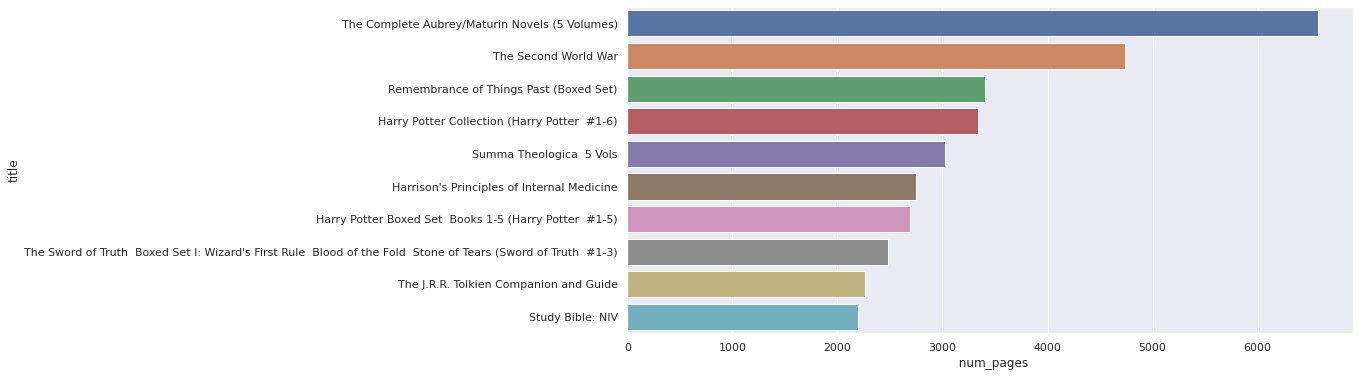

In [13]:
# top 10 longest books
longest_books = df.nlargest(10, ['  num_pages']).set_index('title')
sns.barplot(longest_books['  num_pages'], longest_books.index)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total Ratings')

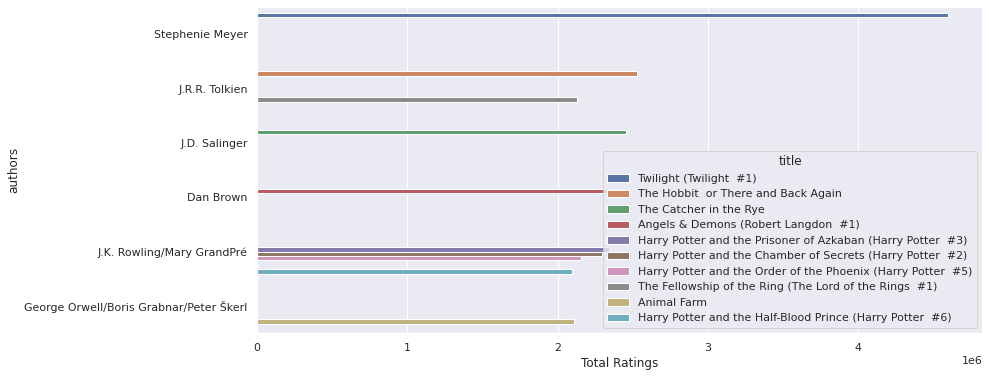

In [14]:
# top 10 authors with highest rated books
sns.set(rc = {'figure.figsize':(13,6)})
authors = df.nlargest(10,'ratings_count').set_index('authors')
graph_rated_books = sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
graph_rated_books.set_xlabel('Total Ratings')

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of Publications')

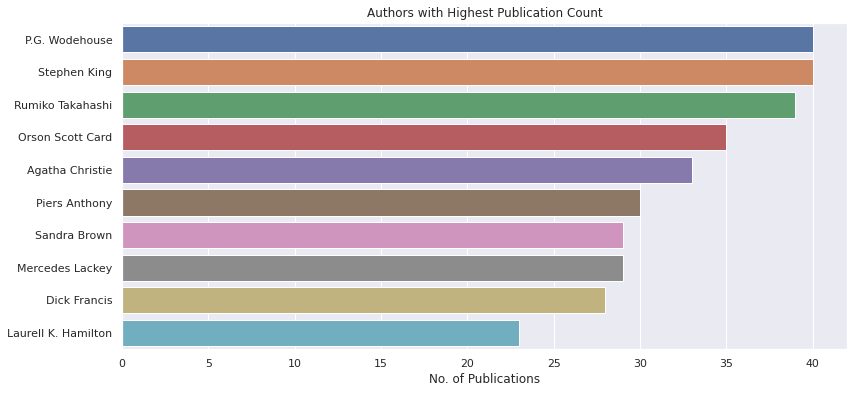

In [15]:
#top 10  authors with highest publications
top_authors = df['authors'].value_counts().head(10)
graph_publi = sns.barplot(top_authors, top_authors.index)
graph_publi.set_title('Authors with Highest Publication Count')
graph_publi.set_xlabel('No. of Publications')

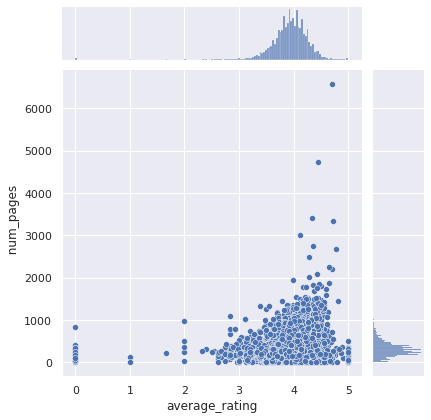

In [16]:
# visualise a bivariate distribution between ratings & no. of pages
sns.jointplot(x = 'average_rating', y = '  num_pages', data = df)

vamos a visualizar cuales son esos valores atipicos que estan por encima de 4000 y por debajo de 7000 paginas

In [17]:
atypical = df.sort_values('  num_pages',ascending=False)
atypical.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books


encontramos que los dos libros con datos atipicos son The Complete Aubrey/Maturin Novels (5 Volumes) y
The Second World War por los autores Patrick O Brian y Winston S. Churchill 

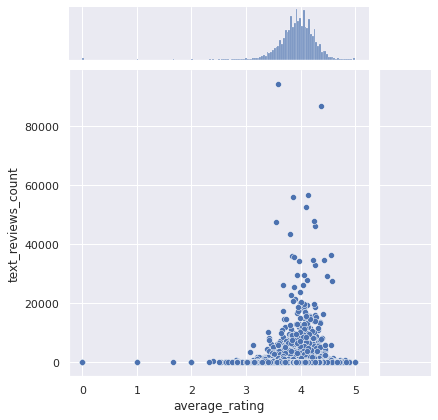

In [18]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = df)

In [19]:
atypical2 = df.sort_values('text_reviews_count',ascending=False)
atypical2.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf


en esta ocacion encontramos que los datos atipicos pertenecen a los libros Twilight (Twilight #1) y The Book Thief escritos por Stephenie Meyer y Markus Zusak

Data Preprocessing

1)Anomaly Detection

<AxesSubplot:xlabel='  num_pages'>

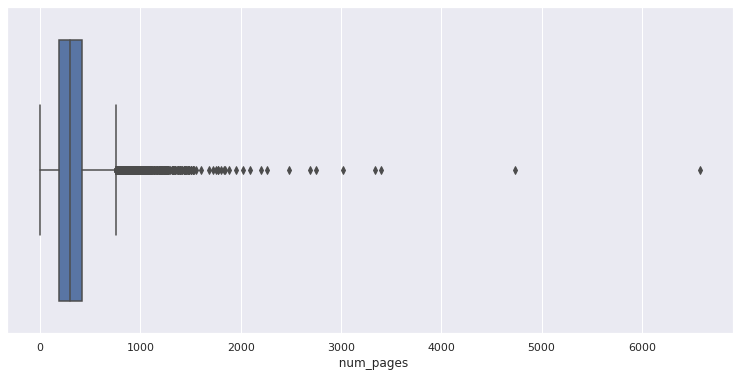

In [20]:
sns.boxplot(x=df['  num_pages'])

La gráfica anterior muestra puntos entre 1000 y 6000, estos son valores atípicos ya que no están incluidos en el cuadro de otra observación, es decir, no están cerca de los cuartiles.

<AxesSubplot:xlabel='ratings_count'>

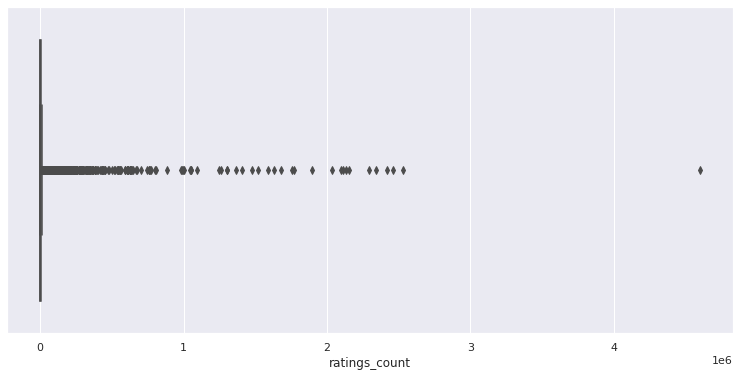

In [21]:
# find ratings count outliers
sns.boxplot(x=df['ratings_count'])

La gráfica anterior muestra puntos entre 1 y 5 que son valores atípicos.

<AxesSubplot:xlabel='text_reviews_count'>

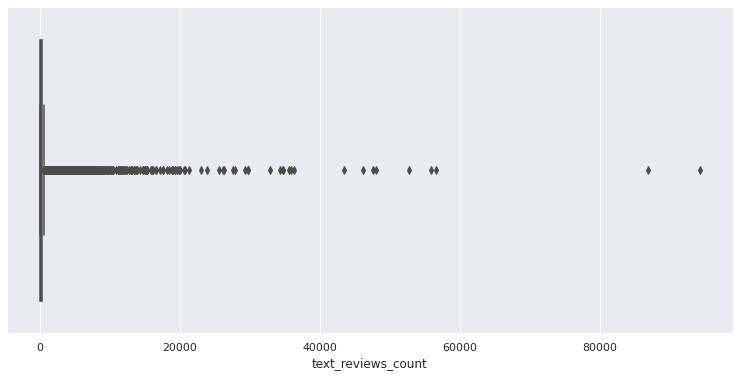

In [22]:
sns.boxplot(x=df['text_reviews_count'])

La gráfica anterior muestra puntos entre 20,000 y 80,000 que son valores atípicos

In [23]:
# remove outliers from no. of pages 
# remove outliers from ratings_count
# remove outliers from text_reviews_count

remove = df.drop(df.index[df['  num_pages'] >= 1000])
remove = df.drop(data.index[df['ratings_count'] >= 1])
remove = df.drop(df.index[df['text_reviews_count'] >= 20000])

Machine Learning Model

In [24]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# divide the data into attributes and labels
X = remove.drop(['average_rating', 'language_code', 'isbn','title','authors','publication_date',
                'publisher'], axis = 1)
y = remove['average_rating']

In [26]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions = lr.predict(X_test)

Ahora compare los valores de salida reales para X_test con los valores pronosticados.

In [29]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.12,3.916244
1,3.96,3.907008
2,4.17,3.904535
3,4.12,3.930454
4,3.97,3.923685
5,3.89,3.883384
6,3.78,3.993798
7,3.85,3.933099
8,3.61,3.908343
9,4.19,3.939250


<AxesSubplot:>

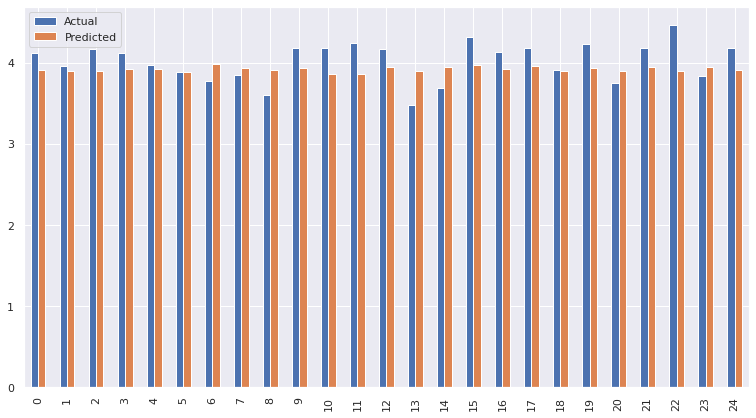

In [30]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

Aunque el modelo no es muy preciso, los porcentajes previstos se acercan a los reales.

In [31]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2378207183822327
MSE: 0.15397733797404056
RMSE: 0.39239946224993805


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88732bc0-c001-4d3f-a58f-a9a2a3ab7388' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>